# Análisis de los 25 retailers más grandes de Estados Unidos

## Objetivo

Una empresa de retail abrirá operaciones en los Estados Unidos. Los gerentes de ventas quieren conocer el mercado de retail mediante el análisis de ventas de las 25 grandes corporaciones de retail en el pais. Los gerentes tienen un listado de preguntas con el propósito de entender mejor el mercado de retail en los Estados Unidos.

Como Data Analyst recien contratado, el objetivo es recopilar información del mercado de retail analizando el reporte de ventas de los competidores:  largest_us_retailers.csv

## Flujo de Trabajo

El análisis se llevara a cabo en 3 etapas:
1. Exploración, análisis y clasificación de la información
2. Responder las preguntas del Negocio
3. Conclusiones y recomendaciones

# I. Exploración, análisis y clasificación de la información

In [1]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar datos aquí
df = pd.read_csv('/work/largest_us_retailers.csv')

## 1. Exploración

In [3]:
# Conocer cuantas filas y columnas tiene el reporte
df.shape

(25, 6)

In [4]:
# Explorar el archivo
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


### Primeras observaciones
1. El reporte (dataframe) contiene 25 filas y 6 columnas
2. Contiene información de las ventas totales (Sales), número de tiendas(Stores), promedio de ventas por tienda (Sales/Avg. Store), crecimiento por tienda ('Store Count Growth') y categoría (Category)
3. Hay valores nulos en el reporte, lo cuales deben ser limpiados

#### Limpieza del reporte, eliminación de valores nulos (NaN)
* Eliminación de valores nulos (NaN) en columnas numéricas

In [5]:
# This class finds columns with numerical dtypes (int64,float64) 
# and replaces NaN values for 0
class FillNaN:
    def __init__(self,dataframe) -> None:
        self.dataframe = dataframe

    def fill_numerical(self):
        self.numerical_column_list = self.dataframe.dtypes[(self.dataframe.dtypes == 'int64') | (self.dataframe.dtypes == 'float64')].index

        for col in self.numerical_column_list:
            self.dataframe[col].replace(np.nan,0,inplace=True)

        return self.dataframe

In [6]:
df1 = FillNaN(df).fill_numerical()

#### Reporte con valores nulos (NaN) eliminados

In [7]:
df1

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,0.0,0.000000,0.000000,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


#### Explorar la columna 'Category'

In [8]:
# Listar las categorias
df.Category

0              Supercenters
1                   Grocery
2            Warehouse Club
3          Home Improvement
4               Drug Stores
5               Drug Stores
6     Electronic/Mail Order
7              Supercenters
8          Home Improvement
9                   Grocery
10          Warehouse Clubs
11                      NaN
12              Electronics
13                  Grocery
14              Drug Stores
15                  Grocery
16        Department Stores
17                  Apparel
18                  Grocery
19            Dollar Stores
20            Dollar Stores
21                  Grocery
22        Department Stores
23                  Grocery
24             Supercenters
Name: Category, dtype: object

#### Observaciones
1. La empresa Apple incl. Online, tiene valor nulo (NaN), no tiene categoria. Esta empresa se le puede reasignar la categoria: Electronic/Mail Order, ya que sus operaciones se basan en compra y envío por internet.
2. Se puede normalizar la categoria: Warehouse Club, se encontraron 2 cateogrias con nombre similares: *Warehouse Club* y *Warehouse Clubs*

#### Asignar la categoria 'Electronic/Mail Order' a la empresa Apple incl. Online 

In [9]:
df1['Category'] = df1['Category'].replace(np.nan,'Electronic/Mail Order')

# 3. Verificar cambio
df1[df1['Company']=='Apple incl. Online']


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
11,Apple incl. Online,37664,0.0,0.0,0.0,Electronic/Mail Order


#### Normalizar la categoria *Warehouse Club* 

* Reemplazar el valor 'Warehouse Clubs' por el valor 'Warehouse Club'
* Codigo sugerido: ```df['column name'] = df['column name'].replace(['old value'],'new value')```

In [11]:
df1['Category'] = df1['Category'].replace(['Warehouse Clubs'],'Warehouse Club')

#### Reporte limpio y listo para analizar

In [12]:
df1

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,0.0,0.000000,0.000000,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## 2. Análisis

In [14]:
df1.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,25.000000,25.000000,25.000000
mean,71063.080000,3189.240000,33.921289,0.037012
std,125405.727644,3984.120117,40.213239,0.066572
min,16592.000000,0.000000,0.000000,-0.059515
25%,24402.000000,794.000000,9.369545,0.000000
50%,34980.000000,1772.000000,24.685956,0.018927
75%,71687.000000,3931.000000,39.982033,0.078241
max,658119.000000,14250.000000,187.795620,0.255662


#### Gráfica de barra para visualizar las ventas totales por empresa

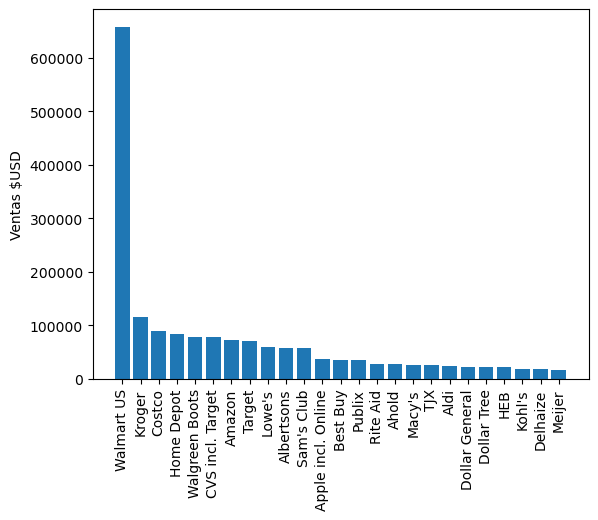

In [18]:
# Organizar el dataframe por la columna 'compañías'
df1 = df1.sort_values('Sales',ascending=False)

# Graficar la cantidad de tiendas por categoría
x = df1['Company']
y = df1['Sales']
plt.bar(x,y)
# plt.xlabel('Empresa')
plt.ylabel('Ventas $USD')
plt.xticks(rotation='vertical')
plt.show()

#### Crear un Dataframe con el número de empresas por categoria

In [ ]:
# Crear una estructura que permita identificar la cantidad de compañías 
# por categoría
category_dict = {
    'Supercenters' : df_category[df_category == 'Supercenters'].count(),
    'Grocery' : df_category[df_category == 'Grocery'].count(),
    'Warehouse Club' : (df_category[df_category == 'Warehouse Club'].count()) 
    + (df_category[df_category == 'Warehouse Clubs'].count()),
    'Home Improvement' : df_category[df_category == 'Home Improvement'].count(),
    'Drug Store': df_category[df_category == 'Drug Stores'].count(),
    'Electronic/Mail Order' : df_category[df_category == 'Electronic/Mail Order'].count(),
    'Electronics' : df_category[df_category == 'Electronics'].count(),
    'Department Stores' : df_category[df_category == 'Department Stores'].count(),
    'Apparel' : df_category[df_category == 'Apparel'].count(),
    'Dollar Stores' : df_category[df_category == 'Dollar Stores'].count()
}

# print(category_dict)

# Convertir el diccionario en un Dataframe
category_dict_df = {
    "categoria" : category_dict.keys(),
    "compañías" : category_dict.values()
}

df_category_df = pd.DataFrame(category_dict_df)
df_category_df



,categoria,compañías
0,Supercenters,3
1,Grocery,7
2,Warehouse Club,2
3,Home Improvement,2
4,Drug Store,3
5,Electronic/Mail Order,2
6,Electronics,1
7,Department Stores,2
8,Apparel,1
9,Dollar Stores,2


#### Confirmar que la suma de las tiendas sea igual a 25

In [ ]:
# Confirmar que la suma de las tiendas sea igual a 25
from functools import reduce

sum_tiendas = reduce(lambda r,e : r + e,df_category_df['compañías'])
print( sum_tiendas)

25


#### Graficar la cantidad de empresas por categoria

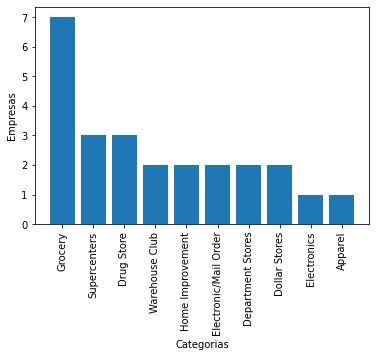

In [ ]:
# Organizar el dataframe por la columna 'compañías'
df_category_sort = df_category_df.sort_values('compañías',ascending=False)

# Graficar la cantidad de tiendas por categoría
x = df_category_sort['categoria']
y = df_category_sort['compañías']
plt.bar(x,y)
plt.xlabel('Categorias')
plt.ylabel('Empresas')
plt.xticks(rotation='vertical')
plt.show()

#### Observaciones
1. La categoria que tiene más empresas es la categoría *Grocery* con 7 
2. En segundo lugar están dos categorías con 3 empresas cada una *Supercenter* y *Drug Store*
3. Hay 5 categorias que tienen 2 empresas. Las categorias son *Warehouse Club*, *Home Improvement*, *Electronic/Mail Order*, *Departmente Stores* y *Dollar Stores*
4. Hay dos categorias con 1 empresa cada una: *Electronics* y *Apparel*

#### Graficar la proporción de empresas por categoria

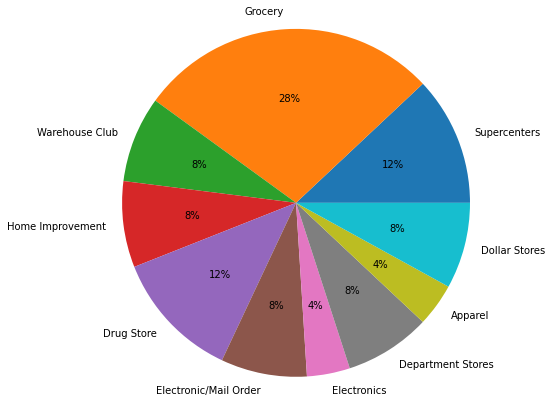

In [ ]:
# Graficar la proporción de empresas por categoría
pie_values = df_category_df['compañías']
pie_labels = df_category_df['categoria']
plt.axis("equal")
plt.pie(pie_values,labels=pie_labels, radius=2, autopct='%0.0f%%')
plt.show()

#### Observaciones
1. La categoría *Grocery* representa el 28% del total de empresas
2. Las categoriás *Supercenter* y *Drug Store* representan el 12% del total respectivamente

#### Analizar y relacionar las ventas por categorías

In [ ]:
# agrupar ventas por categoria
sales_list = df_complete.groupby('Category')['Sales'].sum()
# convertir a dataframe
sales_list_df = pd.DataFrame(sales_list)
# agregar columna 'categoria' a partir del índice
sales_list_df['categoria'] = sales_list_df.index
#desplegar dataframe con las columnas de sales y categoria
sales_list_df

,Sales,categoria
Category,,
Apparel,25012,Apparel
Department Stores,45088,Department Stores
Dollar Stores,43698,Dollar Stores
Drug Stores,184202,Drug Stores
Electronic/Mail Order,109351,Electronic/Mail Order
Electronics,34980,Electronics
Grocery,297164,Grocery
Home Improvement,144287,Home Improvement
Supercenters,745919,Supercenters


In [ ]:
# Categoria con más ventas
sales_list_df[sales_list_df.Sales == sales_list_df.Sales.max()]

,Sales,categoria
Category,,
Supercenters,745919,Supercenters


In [ ]:
# Categoria con menos ventas
sales_list_df[sales_list_df.Sales == sales_list_df.Sales.min()]

,Sales,categoria
Category,,
Apparel,25012,Apparel


#### Graficar la distribución de ventas por categorias

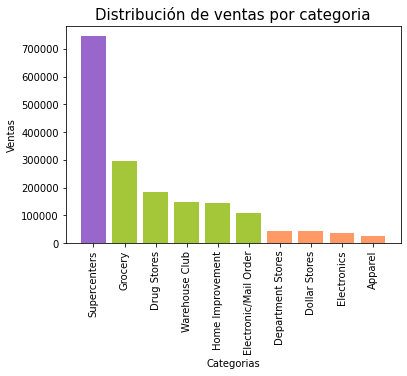

In [ ]:
sales_list_df.describe()
df_sales_list_sorted = sales_list_df.sort_values('Sales',ascending=False)
# observar la distribución de ventas por categoria
x = df_sales_list_sorted['categoria']
y = df_sales_list_sorted['Sales']
c = ['#9966cc','#a4c639','#a4c639','#a4c639','#a4c639','#a4c639','#ff9966','#ff9966','#ff9966','#ff9966']
plt.bar(x,y, color=c)
plt.title('Distribución de ventas por categoria', fontsize=15)
plt.xlabel('Categorias')
plt.ylabel('Ventas')
plt.xticks(rotation='vertical')
plt.show()

#### Graficar la proporción de ventas por categoria

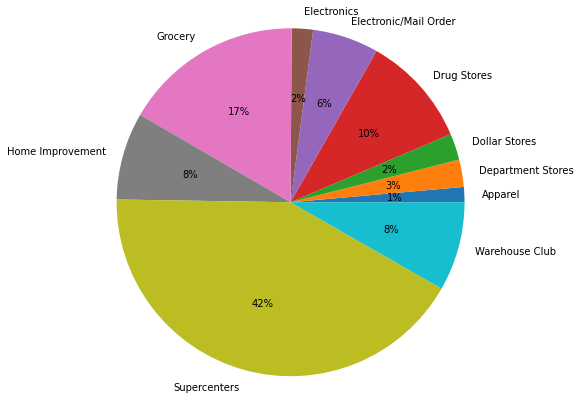

In [ ]:
# Graficar la proporción de ventas por categoria
pie_sales = sales_list_df['Sales']
pie_category = sales_list_df['categoria']
plt.axis("equal")
plt.pie(pie_sales,labels=pie_category, radius=2, autopct='%0.0f%%')
plt.show()

#### Observaciones

1. Se puede observar que la categoria *Supercenters* representa el 42% de las ventas totales

2. La categoria *Grocery* es la categoria que está en segundo lugar con el 17% de las ventas totales
3. La categoria *Apparel*, es la categoria que tuvo menos ventas


In [ ]:
# agrupar el número de tiendas por categoria
stores_category_list = df_complete.groupby('Category')['Stores'].sum()
# convertir a dataframe
df_stores_category_list = pd.DataFrame(stores_category_list)
# agregar columna 'categoria' a partir del índice
df_stores_category_list['Category'] = df_stores_category_list.index
#desplegar dataframe con las columnas de sales y categoria
df_stores_category_list

,Stores,Category
Category,,
Apparel,2770.0,Apparel
Department Stores,2058.0,Department Stores
Dollar Stores,27600.0,Dollar Stores
Drug Stores,22368.0,Drug Stores
Electronic/Mail Order,0.0,Electronic/Mail Order
Electronics,1389.0,Electronics
Grocery,12026.0,Grocery
Home Improvement,3793.0,Home Improvement
Supercenters,6577.0,Supercenters


In [ ]:
# Categoria con mas tiendas
df_stores_category_list[df_stores_category_list.Stores == df_stores_category_list.Stores.max()]

,Stores,Category
Category,,
Dollar Stores,27600.0,Dollar Stores


In [ ]:
# Categoria con menos tiendas
df_stores_category_list[df_stores_category_list.Stores == df_stores_category_list.Stores.min()]

,Stores,Category
Category,,
Electronic/Mail Order,0.0,Electronic/Mail Order


#### Distribución de tiendas por categoria

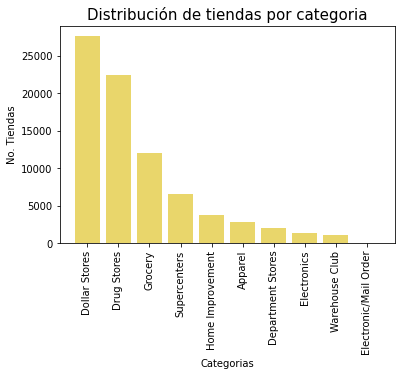

In [ ]:
df_stores_category_list
df_stores_list_sorted = df_stores_category_list.sort_values('Stores',ascending=False)
# observar la distribución de ventas por categoria
x = df_stores_list_sorted['Category']
y = df_stores_list_sorted['Stores']
#c = ['#9966cc','#a4c639','#a4c639','#a4c639','#a4c639','#a4c639','#ff9966','#ff9966','#ff9966','#ff9966']
plt.bar(x,y,color='#e9d66b')
plt.title('Distribución de tiendas por categoria', fontsize=15)
plt.xlabel('Categorias')
plt.ylabel('No. Tiendas')
plt.xticks(rotation='vertical')
plt.show()

#### Graficar la proporción de tiendas por categoria

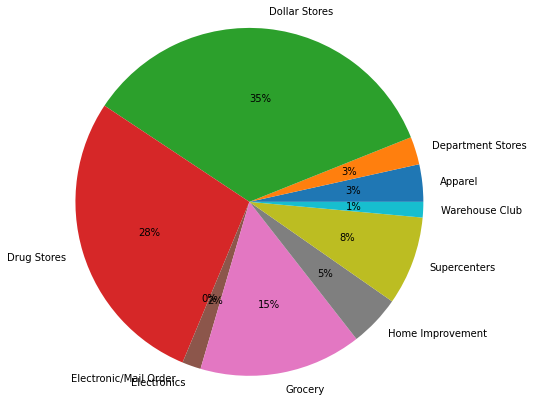

In [ ]:
# Graficar la proporción de tiendas por categoria
pie_sales = df_stores_category_list['Stores']
pie_category = df_stores_category_list['Category']
plt.axis("equal")
plt.pie(pie_sales,labels=pie_category, radius=2, autopct='%0.0f%%')
plt.show()

#### Observaciones
1. La categoria *Dollar Stores*, representa el 35% del total con 27600 tiendas
2. La categoria *Drug Stores* representa el 28% del total con 22368 tiendas
3. La categoria que menos tiendas tiene es *Electronics* representando el 1% con 1150 tiendas
4. La categoria *Electronic/Mail Order*, no cuenta con tiendas fisicas ya que sus operaciones son online

#### Analizar las ventas de la categoria Supercenters

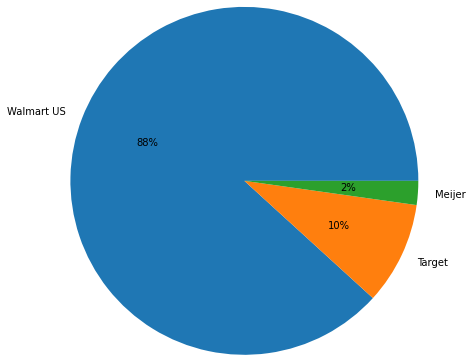

In [ ]:
# Graficar la proporción de ventas por empresa

df_supercenters = df_complete[df_complete.Category == 'Supercenters']

# Crear gráfica la proporción de ventas por empresa
pie_sales = df_supercenters['Sales']
pie_category = df_supercenters['Company']
plt.axis("equal")
plt.pie(pie_sales,labels=pie_category, radius=2, autopct='%0.0f%%')
plt.show()

#### Observaciones
1. Hay 3 empresas dentro de la categoria de *Supercenters* : Walmart US, Target y Meijer
2. Walmart US representa el 88% de ventas en la categoria de *Supercenters*

#### Graficar la relación de ventas por número de tiendas en la categoria Supercenter

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


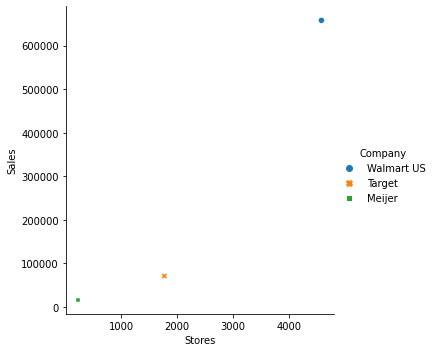

In [ ]:
sns.relplot(df_supercenters['Stores'],df_supercenters['Sales']
,hue=df_supercenters['Company']
,style=df_supercenters['Company'])

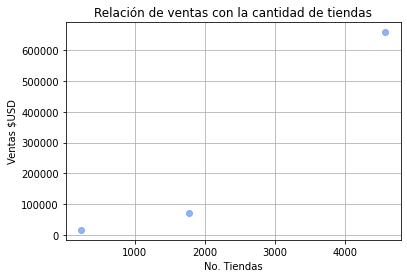

In [ ]:
#available_markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
plt.scatter(x=df_supercenters['Stores'], y=df_supercenters['Sales'],marker='o', c='cornflowerblue', alpha=0.7)
#plt.scatter(x=df_com_sal_sto['tiendas'], y=df_com_sal_sto['Ventas'],marker='o', c='cornflowerblue')
plt.title('Relación de ventas con la cantidad de tiendas')
plt.xlabel('No. Tiendas')
plt.ylabel('Ventas $USD')
#plt.legend('Empresas',fontsize=12)
plt.grid(True)
plt.show()

#### Observaciones
1. De las gráficas se puede interpretar que en la categoria *Supercenter*, la cantidad de tiendas si es un factor en el monto de ventas, donde se observa que a mayor número de tiendas, mayor cantidad de ventas.

#### Graficar la proporción de tiendas por empresa en la categoria Supercenter

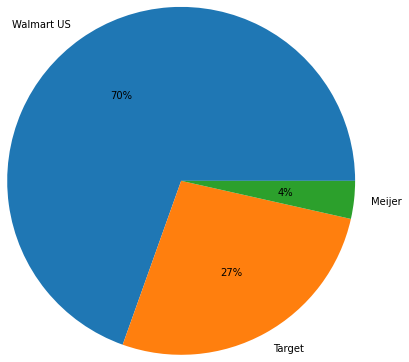

In [ ]:
# Graficar la proporción de tiendas por empresa
pie_sales = df_supercenters['Stores']
pie_category = df_supercenters['Company']
plt.axis("equal")
plt.pie(pie_sales,labels=pie_category, radius=2, autopct='%0.0f%%')
plt.show()

#### Observaciones
1. La cantidad de tiendas (4,574) de Walmart US representa aproximadamente el 70% del total de tiendas en la categoria *Supercenter*

#### Analizar las ventas por empresa

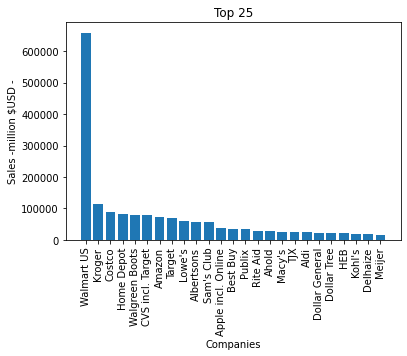

In [ ]:
# Visualizar las ventas por compañía

# crear variables para ordenar datos y graficar
df_sorted = df_complete.sort_values('Sales', ascending=0)
x = df_sorted['Company'][0:25]
y = df_sorted['Sales'][0:25]
#df['Sales'].describe()

# grafica de barra que muestra la relación de compañías con sus ventas
plt.bar(x,y)
plt.xlabel('Companies')
plt.ylabel('Sales -million $USD -')
plt.title('Top 25')
plt.xticks(rotation='vertical')
plt.show()

#### Observaciones
1. Walmart US es la empresa con mayores ventas. Es la empresa dominante con un monto de ventas de $658,119 USD.


#### Calcular la diferencia de ventas entre Walmart US y su competidor más cercano

In [ ]:
# Calcular la diferencia en ventas entre Walmart US y su competidor más cercano
df_sorted = df_complete.sort_values('Sales', ascending=0)
#
df_diferencia = df_sorted['Sales'][0] - df_sorted['Sales'][1]
df_diferencia


543082

2. Walmart US sobrepasa por $543,082 a su competidor más cercano que es Kroger 

#### Datos de la empresa dominante: Walmart US

In [ ]:
# datos de la empresa dominante
Walmart_US = df_complete[(df_complete['Company']=='Walmart US')]
Walmart_US

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


#### Graficar la proporción de ventas de Walmart US con respecto a sus competidores

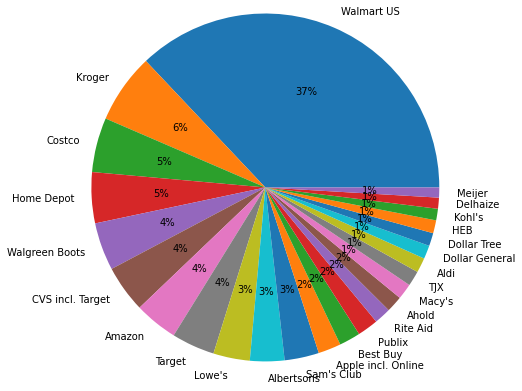

In [ ]:
# Graficar la proporción de ventas de Walmart US
pie_sales = df_complete['Sales']
pie_company = df_complete['Company']
plt.axis("equal")
plt.pie(pie_sales,labels=pie_company, radius=2, autopct='%0.0f%%')
plt.show()

#### Observaciones
3. Walmart US representa el 37% de las ventas totales de los 25 retailers

### 3. Clasificación de la información

#### Clasificación de la información

En base a la exploración y análisis de los datos, se clasificará la información como sigue:
* Ventas
* Tiendas

#### Ventas - Empresa con más ventas sin considerar su categoria

In [ ]:
#df_com_sal_sto.Ventas.max() # retorna el valor
df_complete[df_complete.Sales == df_complete.Sales.max()] # retorna la fila

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


#### Ventas - Empresa con ventas a la media sin considerar su categoria

In [ ]:
df_complete_sorted = df_complete.sort_values('Sales',ascending=False)
df_complete_sorted[df_complete_sorted.Sales == df_complete_sorted.Sales.median()]


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
12,Best Buy,34980,1389.0,24.685956,-0.038754,Electronics


#### Ventas - Empresa con menos ventas sin considerar su categoria

In [ ]:
df_complete[df_complete.Sales == df_complete.Sales.min()]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters


#### Tiendas - Empresa con más tiendas sin considerar su categoria

In [ ]:
df_complete[df_complete.Stores == df_complete.Stores.max()]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores


#### Tiendas - Empresa con tiendas a la media sin considerar su categoria

In [ ]:
df_complete_sorted = df_complete.sort_values('Stores',ascending=False)
df_complete_sorted[df_complete_sorted.Stores == df_complete_sorted.Stores.median()]


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters


#### Tiendas - Empresa con menos tiendas sin considerar categoria

In [ ]:
df_complete_stores = df_complete[df_complete.Stores != 0]
df_complete_stores[df_complete_stores.Stores == df_complete_stores.Stores.min()]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters


#### Empresa con mejor promedio de ventas por tienda sin considerar su categoria

In [ ]:
df_complete[df_complete['Sales/Avg. Store'] == df_complete['Sales/Avg. Store'].max()]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
2,Costco,90048,495.0,187.79562,0.06681,Warehouse Club


#### Empresa que tuvo más ventas sin contar con tiendas fisicas

In [ ]:
no_stores = df_complete[df_complete.Stores == df_complete.Stores.min()] 
no_stores[no_stores.Sales == no_stores.Sales.max()]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,0.0,0.0,0.0,Electronic/Mail Order


#### Observaciones
1. La empresa Kroger cuenta con 3,931 tiendas y su total de ventas fue de $115,037
2. La empresa Dollar Tree cuenta con 14,250 tiendas, pero solo vendió $21,464 USD
3. Esto nos dice que el número de tiendas no es un factor que produzca más ventas. Sin embargo debemos considerar la categoria de las empresas. Por que tal vez, empresas que pertenezcan a una misma categoria, la cantidad de tiendas si puede ser un factor para producir más ventas. Y es el caso de la categoria *Supercenters* donde se observa que el número de tiendas si es un factor determinante en las ventas.

## II. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [ ]:
# dataset sin los datos de la empresa dominante: Walmart US
os_df = df_complete[(df_complete['Company']!='Walmart US')]
promedio = "El promedio es: $" + str(round(os_df['Sales'].mean(),2)) + " million USD"
promedio

'El promedio es: $46602.42 million USD'

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

In [ ]:
mayoria_num = os_df[os_df['Sales'] >= 30000]['Company'].count()
mayoria_ave = round(os_df[os_df['Sales'] >= 30000]['Sales'].mean(),2)
print("La mayoria de las empresas (" + str(mayoria_num) + ") generó arriba de $30,000 USD, teniendo un promedio de ventas de: $" + str(mayoria_ave) + " USD")


La mayoria de las empresas (13) generó arriba de $30,000 USD, teniendo un promedio de ventas de: $66899.38 USD


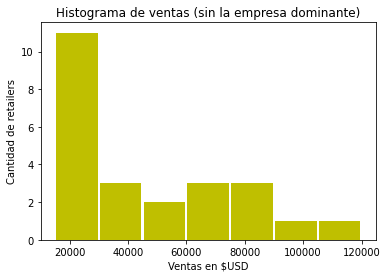

In [ ]:
# lista de valores que se van a graficar en el histograma
#df_complete['Sales']
# plt.hist(os_df['Sales'],bins=7, rwidth=.95)
plt.hist(os_df['Sales'],bins=[15000,30000,45000,60000,75000,90000,105000,120000], rwidth=.95, color='y')
plt.title('Histograma de ventas (sin la empresa dominante)')
plt.xlabel('Ventas en $USD')
plt.ylabel('Cantidad de retailers')
plt.show()

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

#### Respuestas
1. La mayoria de las empresas (16), tienen menos de 3000 tiendas fisicas
2. No se está contando las empresas con tiendas online.

#### Distribución de tiendas

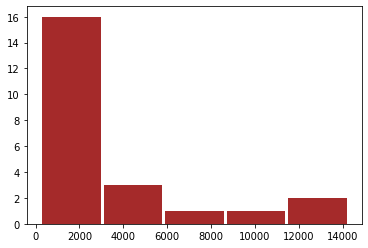

In [ ]:
data_points = df_complete_stores['Stores'].tolist()
fig, ax = plt.subplots()
ax.hist(data_points, bins=5,rwidth=.95, color='#a52a2a')
plt.show()

#### Listado de empresas con menos de 3000 tiendas físicas

In [ ]:
df_complete_stores[df_complete_stores.Stores < 3000]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Club
12,Best Buy,34980,1389.0,24.685956,-0.038754,Electronics
13,Publix,34408,1351.0,25.997733,0.042438,Grocery
15,Ahold,26903,794.0,34.446863,0.033854,Grocery
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores


### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

#### Respuestas
1. Si se comparan las empresas sin tomar encuenta la categoria, entonces, la cantidad de tiendas no tiene que ver con la cantidad de ventas, como se puede ver la gráfica: *Distribución de ventas y numero de tiendas de las empresas sin clasificar*
2. Tomando en cuenta las categorias de las empresas y lo muestran las gráficas se puede interpretar que en la categoria *Supercenter*, la cantidad de tiendas si es un factor en el monto de ventas, donde se observa que a mayor número de tiendas, mayor cantidad de ventas.
2. En la categoria *Grocery*, hay 5 empresas que siguen una tendencia positiva, donde a mayor número de tiendas, sus ventas aumentan.
3. Sin embargo, hay dos tiendas que no siguen la tendencia de las 5 anteriores, ya que si se comparan se observa que tienen mas tiendas pero con menos ventas. Aun así si se aislan estás dos tiendas,, muestran una tendencia positivia propia, donde a más tiendas, mayores ventas.


#### Distribución de ventas y numero de tiendas de las empresas sin clasificar

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


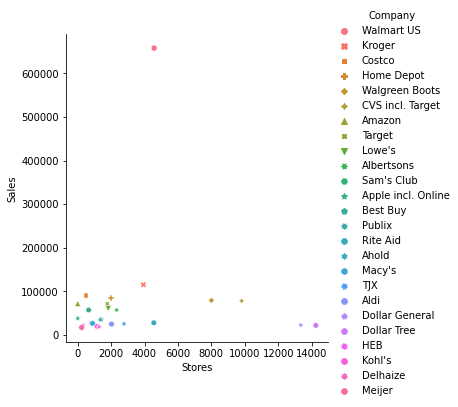

In [ ]:
sns.relplot(df_complete['Stores'],df_complete['Sales'], hue=df_complete['Company'],style=df_complete['Company'])

#### Respuestas
1. La empresa Walmart US cuenta con 4574 tiendas y su total de ventas fue de $658,119 USD
2. La empresa Dollar Tree cuenta con 14,250 tiendas,(9676 más tiendas que Walmart US) pero solo vendió $21,464 USD
3. Esto nos dice que el número de tiendas no es un factor que produzca más ventas. Sin embargo debemos considerar la categoria de las empresas. Por que tal vez, empresas que pertenezcan a una misma categoria, la cantidad de tiendas si puede ser un factor para producir más ventas. Y es el caso de la categoria *Supercenters* donde se observa que el número de tiendas si es un factor determinante en las ventas.

#### Comparar el numero de tiendas con las ventas de las empresas en la categoria *Supercenter*

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


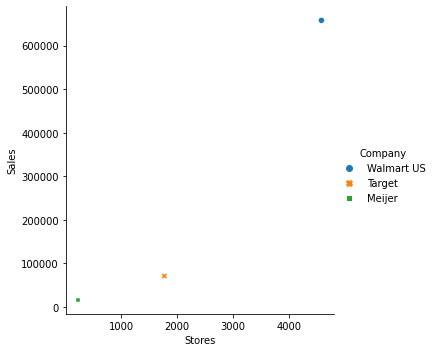

In [ ]:
sns.relplot(df_supercenters['Stores'],df_supercenters['Sales']
,hue=df_supercenters['Company']
,style=df_supercenters['Company'])

#### Relación de las ventas con la cantidad de tiendas en la categoria *Grocery*

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


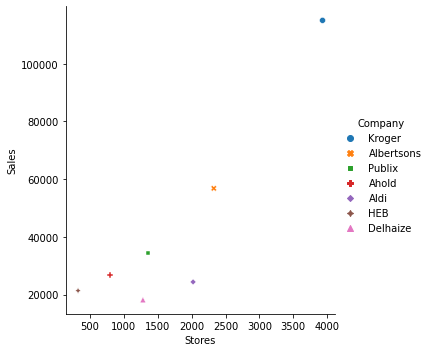

In [ ]:
df_grocery = df_complete[df_complete.Category == 'Grocery']
sns.relplot(df_grocery['Stores'],df_grocery['Sales']
,hue=df_grocery['Company']
,style=df_grocery['Company'])

#### Respuestas
1. De las gráficas se puede interpretar que en la categoria *Supercenter*, la cantidad de tiendas si es un factor en el monto de ventas, donde se observa que a mayor número de tiendas, mayor cantidad de ventas.
2. En la categoria *Grocery*, hay 5 empresas que siguen una tendencia positiva, donde a mayor número de tiendas, sus ventas aumentan.
3. Sin embargo, hay dos tiendas que no siguen la tendencia de las 5 anteriores, ya que si se comparan se observa que tienen mas tiendas pero con menos ventas. Aun así si se aislan estás dos tiendas,, muestran una tendencia positivia propia, donde a más tiendas, mayores ventas.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
df_complete_sorted
rango = df_complete_sorted['Sales'].max() - df_complete_sorted['Sales'].min()
print("El rango es de: $" + str(rango) + " USD")

El rango es de: $641527 USD


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

#### Respuestas
1. Las 5 empresas que tienen más tiendas físicas son: Dollar Tree, Drollar General, CVS incl. Target, Walgreen Boots y Walmart US
2. De las cuales, Walmart US y Walgreen Boots están dentro de las 5 empresas que más ventas tuvieron

In [ ]:
# 5 empresas que más tiendas físicas tienen
df_sorted_stores = df_complete.sort_values('Stores', ascending=False)
retailer_5_with_more_stores = df_sorted_stores[0:5]
retailer_5_with_more_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


#### Gráfica de las 5 empresas con más tiendas

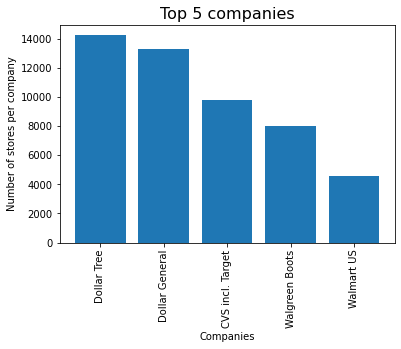

In [ ]:
# crear variables para ordenar datos y graficar
df_sorted_stores = df.sort_values('Stores', ascending=False)
x = df_sorted_stores['Company'][0:5]
y = df_sorted_stores['Stores'][0:5]
# grafica de barra que muestra el numero de tiendas de las 5 empresas mas grandes
plt.bar(x,y)
plt.xlabel('Companies')
plt.ylabel('Number of stores per company')
plt.title('Top 5 companies', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

### 6.1 ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [ ]:
# 5 empresas que más tiendas físicas tienen
df_sorted_stores = df_complete.sort_values('Sales', ascending=False)
retailer_5_with_more_sales = df_sorted_stores[0:5]
retailer_5_with_more_sales

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


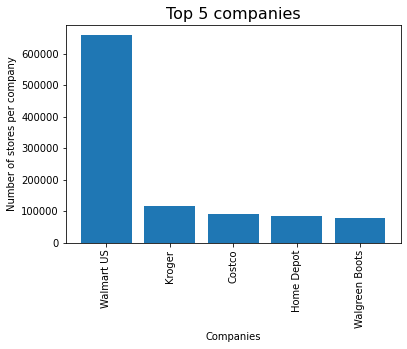

In [ ]:
 # crear variables para ordenar datos y graficar
df_sorted_stores = df_complete.sort_values('Sales', ascending=False)
x = df_sorted_stores['Company'][0:5]
y = df_sorted_stores['Sales'][0:5]
# grafica de barra que muestra el numero de tiendas de las 5 empresas mas grandes
plt.bar(x,y)
plt.xlabel('Companies')
plt.ylabel('Number of stores per company')
plt.title('Top 5 companies', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# filtrar por las empresas con más tiendas
top_5_stores = df_complete.sort_values('Stores', ascending=False)
df_top_5_stores = top_5_stores[0:5]
# Filtrar por las empresas con más ventas
df_top_5_stores[df_top_5_stores.Sales == df_top_5_stores.Sales.max()]['Company']

0    Walmart US
Name: Company, dtype: object

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

#### Respuestas

1. Se puede observar que la categoria *Supercenters* representa el 42% de las ventas totales, convirtiéndose en la categoria que generó más ventas

2. La categoria *Grocery* es la categoria que está en segundo lugar con el 17% de las ventas totales

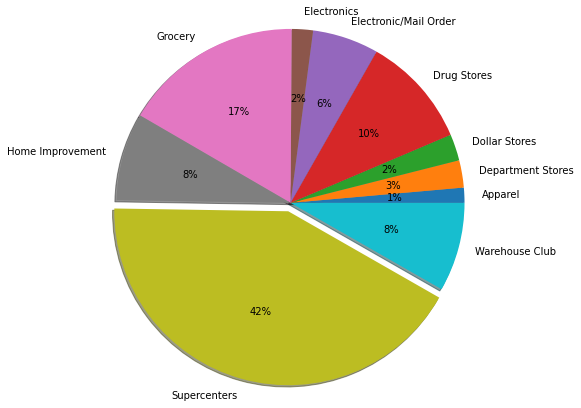

In [ ]:
# Graficar la proporción de ventas por categoria
pie_sales = sales_list_df['Sales']
pie_category = sales_list_df['categoria']
plt.axis("equal")
plt.pie(pie_sales,labels=pie_category, radius=2, autopct='%0.0f%%',shadow=True, explode=[0,0,0,0,0,0,0,0,0.1,0])
#plt.title("Distribución de ventas por categoria", loc='right')
plt.show()

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

#### Respuesta
1. Walmart US con una cantidad de tiendas fisicas de 4574 produjo $658,119 [Dollar amounts in millions], siena la empresa que más tiendas físicas tiene en la categoria *Supercenters*

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


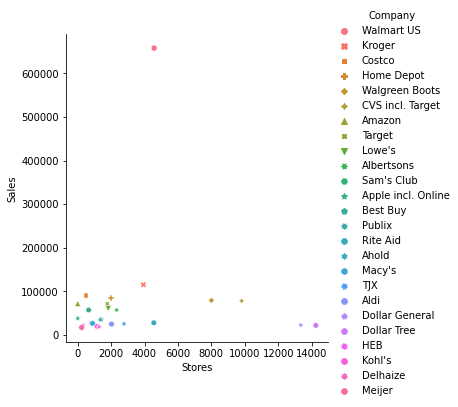

In [ ]:
sns.relplot(df_complete['Stores'],df_complete['Sales']
,hue=df_complete['Company']
,style=df_complete['Company'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


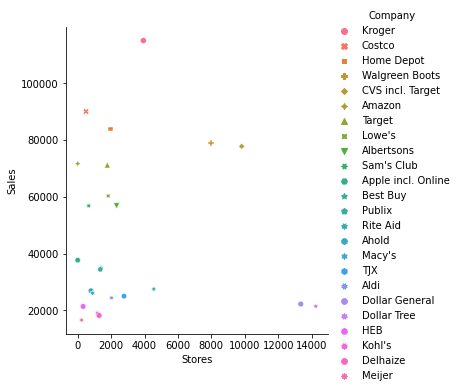

In [ ]:

sns.relplot(os_df['Stores'],os_df['Sales']
,hue=os_df['Company']
,style=os_df['Company'])

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

#### Respuesta
1. Las empresas que venden online son: Amazon y Apple
2. Las ventas online, solo representan el 6% del total de ventas

In [ ]:
# Empresas online
no_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,0.0,0.0,0.0,Electronic/Mail Order
11,Apple incl. Online,37664,0.0,0.0,0.0,Electronic/Mail Order


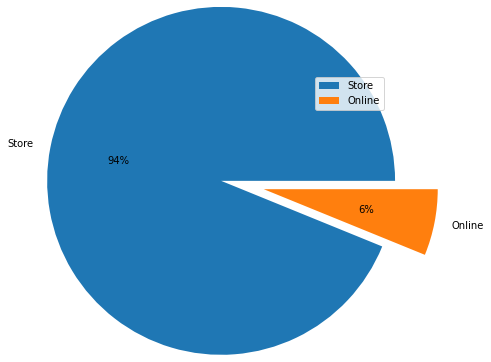

In [ ]:

no_stores_sales = no_stores.Sales.sum()

# empresas con tiendas físicas
with_stores = df_complete[df_complete['Stores'] != 0]
with_stores_sales = with_stores.Sales.sum()

# diccionario
sales_stores_no_stores = {
    "Sales" : [with_stores_sales,no_stores_sales]
    ,"Subcategory" : ["Store","Online"]
    #,"index" : [0]
}

#sales_stores_no_stores
df_sales_stores_no_stores = pd.DataFrame(sales_stores_no_stores)
#df_sales_stores_no_stores

# graficar
pie_sales = df_sales_stores_no_stores['Sales']
pie_category = df_sales_stores_no_stores['Subcategory']
plt.axis("equal")
plt.pie(pie_sales,labels=pie_category, radius=2, autopct='%0.0f%%', explode=[0,.5])
plt.legend()
plt.show()

## III. Tus propias preguntas

### 10. Pregunta

### 11. Pregunta

### 12. Pregunta

## III. Conclusiones

Se puede concluir que si se maneja la información por categorias, se puede tener un mejor entendimiento de los datos proporcionados, donde se puede observar que para las empresas que cuentan con tiendas físicas, cuando incrementan el número de sucursales, pueden incrementar sus ventas, pero puede ser factor de bajar el rendimiento por tienda. 


#### Recomendaciones
En base a los números de ventas hechos por Walmart US, se recomienda hacer un estudio de la estrategia que usa Walmart US. Ya que siendo un competidor tan fuerte, sigue una estrategia que le ha funcionado. Su estrategia no está en el número de tiendas, ya que la empresa Dollar Tree, cuenta con más sucursales (14250) que Walmart US y solo ha alcanzado ventas por (*$21,464*) 

En cambio Walmart US con 5474 sucursales ha alcanzado ventas por (*$6581,19*). 

Por supuesto hay que aclarar que ambas empresas pertenecen a categorias distintas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=65c713ba-14d4-4d31-bc27-e023f18c8bec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>